# **10장 – 케라스를 사용한 인공 신경망 소개**

# 설정

먼저 몇 개의 모듈을 임포트합니다. 맷플롯립 그래프를 인라인으로 출력하도록 만들고 그림을 저장하는 함수를 준비합니다. 또한 파이썬 버전이 3.5 이상인지 확인합니다(파이썬 2.x에서도 동작하지만 곧 지원이 중단되므로 파이썬 3을 사용하는 것이 좋습니다). 사이킷런 버전이 0.20 이상인지와 텐서플로 버전이 2.0 이상인지 확인합니다.

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 퍼셉트론

**노트**: 사이킷런 향후 버전에서 `max_iter`와 `tol` 매개변수의 기본값이 바뀌기 때문에 경고를 피하기 위해 명시적으로 지정합니다.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)  # setosa==1,   non-setosa==0 으로 라벨링

#per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)


C:\Users\HERTAE~1\AppData\Local\Temp/ipykernel_18808/3640376079.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)  # setosa==1,   non-setosa==0 으로 라벨링


Perceptron(random_state=42)

In [3]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

그림 저장: perceptron_iris_plot


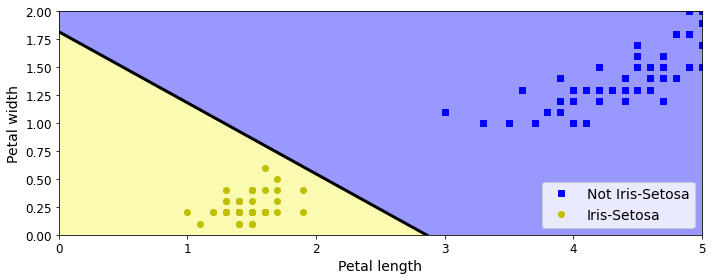

In [4]:
# 결정경계 시각화

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# 활성화 함수

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

그림 저장: activation_functions_plot


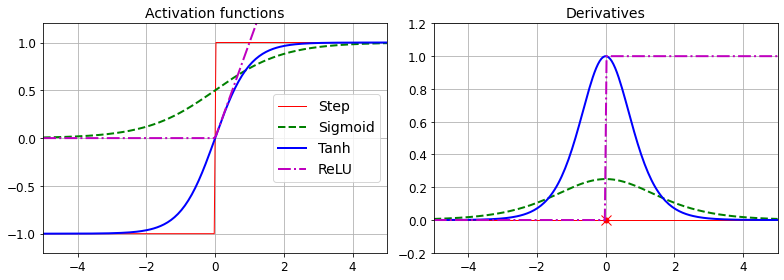

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

# XOR 문제를 해결한 예 : 학습은 아님

In [7]:
def heaviside(z):   # == unit step function
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

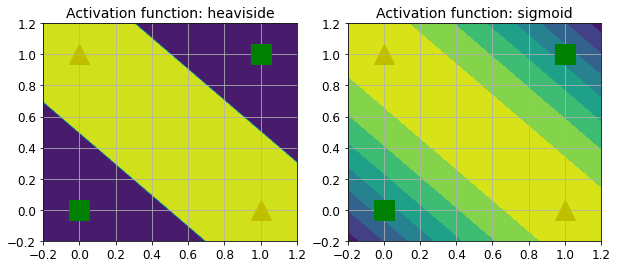

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Sequential API : 간단한 프로그램
Layer를 순서적으로 연결 : 대부분 가능. 복잡한 것은 안됨

먼저 텐서플로와 케라스를 임포트합니다.

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.10.0'

In [11]:
keras.__version__

'2.10.0'

### 분류 MLP : fasion NMIST

케라스는 `keras.datasets`에 널리 사용하는 데이터셋을 로드하기 위한 함수를 제공합니다. 이 데이터셋은 이미 훈련 세트와 테스트 세트로 나누어져 있습니다. 훈련 세트를 더 나누어 검증 세트를 만드는 것이 좋습니다:

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

훈련 세트는 60,000개의 흑백 이미지입니다. 각 이미지의 크기는 28x28 픽셀입니다:

In [13]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

전체 훈련데이터 60,000개를 검증데이터 5,000개, 훈련데이터 55,000개로 나눔.  시험데이터는 10,000개. <p>
또한 픽셀 강도를 255로 나누어 0~1 범위의 실수로 변환.

In [14]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
print('X_valid, X_train, X_test :', X_valid.shape, X_train.shape, X_test.shape)

X_valid, X_train, X_test : (5000, 28, 28) (55000, 28, 28) (10000, 28, 28)


맷플롯립의 `imshow()` 함수와 `'binary'` 컬러맵을 사용해 이미지를 출력할 수 있습니다:

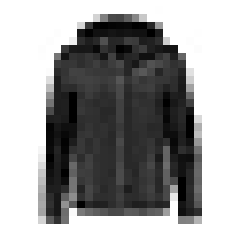

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

레이블은 0에서 9까지 (uint8로 표현된) 클래스 아이디입니다:

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

클래스 이름은 다음과 같습니다:

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

훈련 세트에 있는 첫 번째 이미지는 코트입니다:

In [18]:
class_names[y_train[0]]

'Coat'

이 데이터셋에 있는 샘플 이미지를 몇 개 출력해 보죠:

그림 저장: fashion_mnist_plot


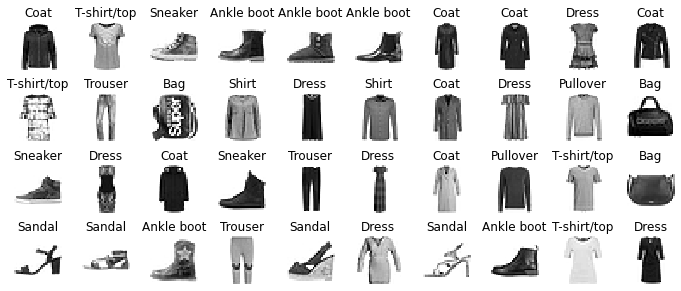

In [19]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.layers

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [26]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [27]:
model.get_layer(hidden1.name) is hidden1

True

In [28]:
weights, biases = hidden1.get_weights()

In [29]:
weights

array([[-0.06800434, -0.03546961,  0.07048607, ...,  0.02339234,
        -0.06843645, -0.02803159],
       [-0.05142818,  0.01697262, -0.03364385, ..., -0.01545797,
         0.06990489, -0.02545852],
       [-0.05293923, -0.02997298,  0.0564421 , ..., -0.07019752,
         0.02357303, -0.04949239],
       ...,
       [-0.02280157,  0.04775752, -0.05744989, ..., -0.00193868,
        -0.0699474 , -0.02810717],
       [ 0.05872996,  0.05723067,  0.07336296, ..., -0.02738184,
        -0.01603119, -0.01520085],
       [-0.01712872, -0.01831236,  0.0054291 , ...,  0.00462956,
        -0.07283184, -0.02460789]], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
biases.shape

(300,)

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

위 코드는 다음과 같습니다:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [34]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7081 - accuracy: 0.7651 - val_loss: 0.5271 - val_accuracy: 0.8176
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4866 - accuracy: 0.8294 - val_loss: 0.4343 - val_accuracy: 0.8518
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4422 - accuracy: 0.8435 - val_loss: 0.5244 - val_accuracy: 0.8032
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4165 - accuracy: 0.8549 - val_loss: 0.3941 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8612 - val_loss: 0.3772 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3800 - accuracy: 0.8666 - val_loss: 0.3717 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3676 - accuracy: 0.8705 - val_loss: 0.3663 - val_accuracy:

In [35]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [36]:
print(type(history.epoch), history.epoch)

<class 'list'> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [37]:
print(type(history.history), history.history.keys())
print(history.history['loss'])

<class 'dict'> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.7080514430999756, 0.4866158366203308, 0.44219473004341125, 0.416465163230896, 0.3982217013835907, 0.3799535632133484, 0.36759406328201294, 0.35645851492881775, 0.3456617295742035, 0.3358151912689209, 0.3275538980960846, 0.31791818141937256, 0.31108537316322327, 0.3045901954174042, 0.2968648672103882, 0.2919555902481079, 0.2862687408924103, 0.28026705980300903, 0.27591702342033386, 0.26993197202682495, 0.2649856209754944, 0.2602168917655945, 0.25628867745399475, 0.25201714038848877, 0.2473701685667038, 0.24362428486347198, 0.24013040959835052, 0.23646889626979828, 0.23227891325950623, 0.22859133780002594]


In [38]:
import pandas as pd

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.708051,0.765055,0.527067,0.8176
1,0.486616,0.829382,0.434250,0.8518
2,0.442195,0.843509,0.524414,0.8032
3,0.416465,0.854909,0.394063,0.8676
4,0.398222,0.861236,0.377187,0.8656


(0.0, 1.0)

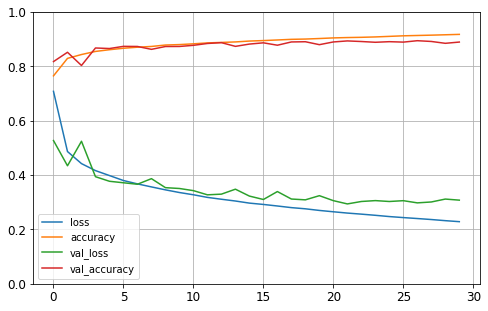

In [39]:
# df 시각화
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.8795


[0.34427139163017273, 0.8794999718666077]

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 61ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [47]:
#y_pred = model.predict_classes(X_new)

y_prob = model.predict(X_new)
y_pred = y_prob.argmax(axis=-1)
y_pred

1/1 [==============================] - 0s 15ms/step


array([9, 2, 1], dtype=int64)

In [48]:
y_pred = np.argmax(model.predict(X_new), axis=-1)  # 위 대신 이것을 선호
y_pred

1/1 [==============================] - 0s 15ms/step


array([9, 2, 1], dtype=int64)

In [49]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [50]:
y_test[:3]   # true class label

array([9, 2, 1], dtype=uint8)

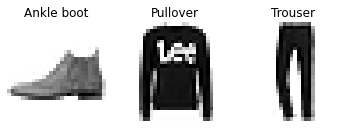

In [51]:
# visualize test samples
#plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)


### 회귀 MLP : California Housing Prices

캘리포니아 주택 데이터셋을 로드하여 나누고 스케일을 바꾸어 보겠습니다(2장에서 사용한 수정된 버전이 아니라 원본을 사용합니다):

In [52]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [53]:
X_train.shape, X_valid.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [54]:
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


363/363 [==============================] - 1s 3ms/step - loss: 1.8700 - val_loss: 0.9059
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7517 - val_loss: 0.6820
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6621 - val_loss: 0.6218
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6235 - val_loss: 0.5740
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5946 - val_loss: 0.5474
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5697 - val_loss: 0.5289
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5482 - val_loss: 0.5204
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5295 - val_loss: 0.4888
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5128 - val_loss: 0.4779
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4984 - val_loss: 0.4642
Epoch 11/2

In [135]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


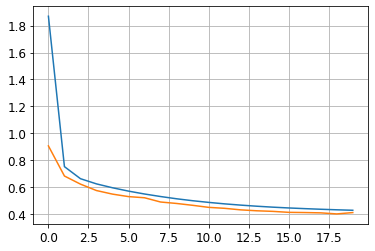

In [57]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
#plt.show()

In [58]:
y_pred

array([[0.479242 ],
       [1.650764 ],
       [3.2570298]], dtype=float32)

# 함수형 API : 복잡한 레이어 연결 구조 표현 가능

모든 신경망 모델이 단순하게 순서대로 나열되지는 않습니다. 어떤 신경망은 매우 복잡한 구조를 가집니다. 여러 개의 입력이 있거나 여러 개의 출력이 있습니다. 예를 들어 와이드 & 딥 신경망([논문](https://ai.google/research/pubs/pub45413) 참조)은 입력의 전체 또는 일부를 출력층에 바로 연결합니다.  <img src="Fig.10-14 Wide_Deep_Network.PNG">

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

### California Housing Prices 데이터 계속 사용
### Wide & Deep Model

In [60]:
input_ = keras.layers.Input(shape=X_train.shape[1:])  # X_train.shaple=(11610, 8)
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [61]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [62]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [63]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.6723 - val_loss: 5.7437
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7691 - val_loss: 0.7751
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6634 - val_loss: 0.6402
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6254 - val_loss: 0.5960
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5944 - val_loss: 0.5703
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5659 - val_loss: 0.5262
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5446 - val_loss: 0.5110
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5258 - val_loss: 0.5275
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5077 - val_loss: 0.4749
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4933 - val_loss: 0.4618

In [64]:
mse_test = model.evaluate(X_test, y_test)
print('mse_test :', mse_test)

y_pred = model.predict(X_new)
print('X_new :', X_new.round(3))
print('y_pred :', y_pred.round(3))

162/162 [==============================] - 0s 1ms/step - loss: 0.4189
mse_test : 0.418936550617218
1/1 [==============================] - 0s 34ms/step
X_new : [[-1.158 -0.287 -0.496 -0.166 -0.029  0.389  0.194  0.287]
 [-0.713  0.109 -0.163  0.202  0.128 -0.118 -0.237  0.062]
 [-0.216  1.849 -0.58   0.185 -0.104 -0.677  1.009 -1.427]]
y_pred : [[0.698]
 [1.746]
 [3.576]]


### 입력을 나누어 보내는 경우
(특징 0에서 4까지) 5개 : Wide 경로 <p>
(특성 2에서 7까지) 6개 : Deep 경로에 전달 <p>
- 3개의 특성(특성 2, 3, 4)은 양쪽에 모두 전달됨

In [65]:
input_A = keras.layers.Input(shape=[5], name="wide_input")  # 5개 값을 받을 것이라고만 알려줌.  값은 fit() 때 넣음
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [66]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [67]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.2741 - val_loss: 1.5148
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8817 - val_loss: 0.7546
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7350 - val_loss: 0.7034
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6667 - val_loss: 0.6315
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6188 - val_loss: 0.5870
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5759 - val_loss: 0.5582
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5394 - val_loss: 0.5311
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5092 - val_loss: 0.4806
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4858 - val_loss: 0.4562
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4700 - val_loss: 0.4433

### 출력을 여러개 하는 보내는 경우
규제를 넣기위해 보조 출력을 추가했음 (가중치는 메인 90%, 보조 10%)

In [68]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [131]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [70]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [71]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.3205 - main_output_loss: 2.0538 - aux_output_loss: 4.7207 - val_loss: 1.9350 - val_main_output_loss: 1.8040 - val_aux_output_loss: 3.1137
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.9545 - main_output_loss: 0.7747 - aux_output_loss: 2.5727 - val_loss: 0.8445 - val_main_output_loss: 0.7183 - val_aux_output_loss: 1.9798
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7765 - main_output_loss: 0.6616 - aux_output_loss: 1.8107 - val_loss: 0.7229 - val_main_output_loss: 0.6291 - val_aux_output_loss: 1.5675
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7048 - main_output_loss: 0.6183 - aux_output_loss: 1.4834 - val_loss: 0.6768 - val_main_output_loss: 0.5970 - val_aux_output_loss: 1.3948
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6632 - main_output_loss: 0.5897 - aux_output_loss: 1.3242 - val_loss

In [72]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 40ms/step


# 서브클래싱 API : 동적 모델이 필요한 경우
Input Layer 없음.  call()에 매개변수로 입력을 넘겨줌. <p>
프로그램 자유도가 높음 : call()안에 조건문, 저수준 api 사용할 수 있음, 디버깅 편함 <p>


In [73]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [74]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.3904 - output_1_loss: 2.3137 - output_2_loss: 3.0804 - val_loss: 1.6742 - val_output_1_loss: 1.2407 - val_output_2_loss: 5.5758
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 1.0566 - output_1_loss: 0.9561 - output_2_loss: 1.9607 - val_loss: 1.2267 - val_output_1_loss: 0.8243 - val_output_2_loss: 4.8489
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.8590 - output_1_loss: 0.7725 - output_2_loss: 1.6377 - val_loss: 1.1098 - val_output_1_loss: 0.7164 - val_output_2_loss: 4.6504
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7737 - output_1_loss: 0.6940 - output_2_loss: 1.4914 - val_loss: 1.0189 - val_output_1_loss: 0.6536 - val_output_2_loss: 4.3066
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7202 - output_1_loss: 0.6440 - output_2_loss: 1.4056 - val_loss: 0.9372 - val_output_1_loss: 0.6145 - val_ou

In [75]:
model = WideAndDeepModel(30, activation="relu")

# 저장과 복원 : Subclassing API 는 안됨

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [77]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 2.4382 - val_loss: 1.4437
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7585 - val_loss: 0.6683
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6609 - val_loss: 0.7199
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6172 - val_loss: 0.5961
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5829 - val_loss: 0.5549
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5535 - val_loss: 0.5474
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5303 - val_loss: 0.5570
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5111 - val_loss: 0.4858
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4935 - val_loss: 0.4776
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4617


In [78]:
model.save("my_keras_model.h5")  # hdf5 format.  saved_format=tf하면 SavedModel format

In [79]:
model = keras.models.load_model("my_keras_model.h5")

In [80]:
model.predict(X_new)

1/1 [==============================] - 0s 33ms/step


array([[0.8209197],
       [1.3770009],
       [3.2501698]], dtype=float32)

In [81]:
model.save_weights("my_keras_weights.ckpt")

In [82]:
model.load_weights("my_keras_weights.ckpt")

# 훈련 과정에서 콜백 사용하기

In [83]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [84]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [85]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.9872 - val_loss: 1.2349
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7410 - val_loss: 0.6706
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6795 - val_loss: 0.6406
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6454 - val_loss: 0.7213
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6131 - val_loss: 0.6232
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5844 - val_loss: 0.5359
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5610 - val_loss: 0.5128
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5392 - val_loss: 0.6022
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5189 - val_loss: 0.4781
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4809


In [86]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4866 - val_loss: 0.4641
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4731 - val_loss: 0.4581
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4619 - val_loss: 0.4448
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4516 - val_loss: 0.4779
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4431 - val_loss: 0.4290
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4353 - val_loss: 0.4600
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4286 - val_loss: 0.4166
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4226 - val_loss: 0.4172
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4174 - val_loss: 0.4259
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4127 - val_lo

In [87]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [88]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

356/363 [============================>.] - ETA: 0s - loss: 0.3631
val/train: 1.20
363/363 [==============================] - 1s 3ms/step - loss: 0.3638 - val_loss: 0.4366


# 텐서보드

In [89]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [90]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_12_02-15_08_12'

In [91]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [93]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 2.0712 - val_loss: 15.4781
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.8787 - val_loss: 0.6932
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6557 - val_loss: 0.6497
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6086 - val_loss: 0.5713
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5740 - val_loss: 0.5317
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5432 - val_loss: 0.5086
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5195 - val_loss: 0.4889
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4990 - val_loss: 0.4659
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4812 - val_loss: 0.4486
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4670 - val_loss: 0.434

텐서보드 서버를 실행하는 한 가지 방법은 터미널에서 직접 실행하는 것입니다. 터미널을 열고 텐서보드가 설치된 가상 환경을 활성화합니다. 그다음 노트북 디렉토리로 이동하여 다음 명령을 입력하세요:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

그다음 웹 브라우저를 열고 [localhost:6006](http://localhost:6006)에 접속하면 텐서보드를 사용할 수 있습니다. 사용이 끝나면 터미널에서 Ctrl-C를 눌러 텐서보드 서버를 종료하세요.

또는 다음처럼 텐서보드의 주피터 확장을 사용할 수 있습니다(이 명령은 텐서보드가 로컬 컴퓨터에 설치되어 있어야 합니다):

In [94]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

모델 하나 더 만들어 tensorboard에서 비교

In [95]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_12_02-15_08_48'

In [96]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))  # lr 달라졌음

In [98]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6722 - val_loss: 898.4388
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4411 - val_loss: 1.0009
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3992 - val_loss: 0.4490
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3685 - val_loss: 0.3260
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3557 - val_loss: 0.3416
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3414 - val_loss: 0.3261
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3352 - val_loss: 0.3067
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3311 - val_loss: 0.3085
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3258 - val_loss: 0.3168
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3221 - val_loss: 0.31

텐서보드에 실행 결과가 2개 있습니다. 학습 곡선을 비교해 보세요.

In [99]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 6496), started 0:00:29 ago. (Use '!kill 6496' to kill it.)

# 참고 : 하이퍼파라미터 튜닝

In [100]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [102]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\HERTAE~1\AppData\Local\Temp/ipykernel_18808/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [103]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.2397 - val_loss: 8.6611
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6309 - val_loss: 7.5582
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5295 - val_loss: 4.0974
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4716 - val_loss: 1.9610
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4382 - val_loss: 0.6690
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4236 - val_loss: 0.6514
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4179 - val_loss: 0.4067
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4114 - val_loss: 0.3865
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4066 - val_loss: 0.3840
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4031 - val_lo

In [104]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3713


In [105]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 30ms/step


In [106]:
np.random.seed(42)
tf.random.set_seed(42)

**경고**: 다음 셀은 훈련이 끝날 때 에러가 납니다. 이는 최근 사이킷런의 변화때문에 생긴 [케라스 이슈 #13586](https://github.com/keras-team/keras/issues/13586) 때문입니다. 이 이슈를 해결하기 위한 [풀 리퀘스트 #13598](https://github.com/keras-team/keras/pull/13598)가 있으므로 곧 해결될 것 같습니다.

In [109]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100


C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 3.1748 - val_loss: 10.9583
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.6057 - val_loss: 6.8689
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0650 - val_loss: 4.1133
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8408 - val_loss: 2.2360
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7297 - val_loss: 1.3262
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6717 - val_loss: 0.9420
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6372 - val_loss: 0.7201
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6134 - val_loss: 0.6192
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5955 - val_loss: 0.5745
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5804 - val_loss: 0.5478


C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 3.2497 - val_loss: 9.2020
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.5980 - val_loss: 14.1754
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1953 - val_loss: 13.9400
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9994 - val_loss: 12.6096
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8757 - val_loss: 10.8693
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7974 - val_loss: 9.3855
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7471 - val_loss: 8.0765
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7128 - val_loss: 6.8099
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6868 - val_loss: 5.8396
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6653 - val_loss: 4.96

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 3.1847 - val_loss: 2.8358
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.4321 - val_loss: 2.1870
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0226 - val_loss: 1.2270
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8480 - val_loss: 0.8542
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7563 - val_loss: 0.7167
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7035 - val_loss: 0.6582
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6695 - val_loss: 0.6311
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6457 - val_loss: 0.6211
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6273 - val_loss: 0.5966
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6113 - val_loss: 0.5770
E

242/242 [==============================] - 1s 3ms/step - loss: 0.3672 - val_loss: 0.3850
Epoch 82/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3665 - val_loss: 0.3840
Epoch 83/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3658 - val_loss: 0.3818
Epoch 84/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3652 - val_loss: 0.3891
Epoch 85/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3645 - val_loss: 0.3729
Epoch 86/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3640 - val_loss: 0.3814
Epoch 87/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3634 - val_loss: 0.3866
Epoch 88/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3629 - val_loss: 0.3841
Epoch 89/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3623 - val_loss: 0.3887
Epoch 90/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3617 - val_loss: 

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.5649 - val_loss: 1.7785
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9941 - val_loss: 0.8956
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7778 - val_loss: 0.7284
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7234 - val_loss: 0.6808
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6933 - val_loss: 0.6544
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6695 - val_loss: 0.6327
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6485 - val_loss: 0.6185
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6297 - val_loss: 0.5963
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6122 - val_loss: 0.5782
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5960 - val_loss: 0.5634
E

242/242 [==============================] - 1s 2ms/step - loss: 0.3786 - val_loss: 0.3805
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3781 - val_loss: 0.3788
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3775 - val_loss: 0.3713
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3769 - val_loss: 0.3718
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3764 - val_loss: 0.3696
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3755 - val_loss: 0.3760
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3754 - val_loss: 0.3622
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3748 - val_loss: 0.3622
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3742 - val_loss: 0.3629
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3737 - val_loss: 

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.6637 - val_loss: 8.8949
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9334 - val_loss: 7.2037
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7820 - val_loss: 4.1316
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7276 - val_loss: 2.0888
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6905 - val_loss: 1.0244
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6605 - val_loss: 0.6474
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6350 - val_loss: 0.6616
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6127 - val_loss: 0.9415
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5932 - val_loss: 1.3542
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5760 - val_loss: 1.8241
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.6311 - val_loss: 1.9279
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9340 - val_loss: 0.9083
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7042 - val_loss: 0.6954
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6498 - val_loss: 0.6331
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6203 - val_loss: 0.6186
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5969 - val_loss: 0.5902
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5765 - val_loss: 0.5710
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5587 - val_loss: 0.5361
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5432 - val_loss: 0.5460
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5292 - val_loss: 0.5375
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.1830 - val_loss: 0.8374
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5440 - val_loss: 0.4826
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4581 - val_loss: 0.4094
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4147 - val_loss: 0.3793
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3902 - val_loss: 0.3638
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3755 - val_loss: 0.4249
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3655 - val_loss: 0.3488
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3574 - val_loss: 0.4514
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3537 - val_loss: 0.3477
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3482 - val_loss: 0.4018
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 1.2882 - val_loss: 0.5757
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5470 - val_loss: 1.3047
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4701 - val_loss: 1.3316
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4295 - val_loss: 1.0612
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4047 - val_loss: 0.7609
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3886 - val_loss: 0.5721
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3778 - val_loss: 0.4179
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3685 - val_loss: 0.3701
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3587 - val_loss: 0.3401
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3533 - val_loss: 0.3438
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.0425 - val_loss: 6.6737
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5942 - val_loss: 3.1558
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4796 - val_loss: 0.4858
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4244 - val_loss: 0.3966
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4020 - val_loss: 0.3880
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3882 - val_loss: 0.3977
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3797 - val_loss: 0.3847
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3730 - val_loss: 0.3719
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3662 - val_loss: 0.3899
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3637 - val_loss: 0.3385
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 1.4547 - val_loss: 699.2193
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 3.2930 - val_loss: 457.6174
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 4.7910 - val_loss: 2267.6890
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 2.4354 - val_loss: 1460.9819
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 6.1058 - val_loss: 6147.1743
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 275.8380 - val_loss: 12075.0186
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 91.6009 - val_loss: 26957.3730
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 1010.6954 - val_loss: 53539.1328
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 813.8870 - val_loss: 122980.9688
Epoch 10/100
242/242 [==============================] - 0s 2ms/st

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 0.8326 - val_loss: 11.8849
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5205 - val_loss: 25.0902
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5083 - val_loss: 26.5383
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5181 - val_loss: 23.9443
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5184 - val_loss: 23.2755
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5153 - val_loss: 21.6888
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5214 - val_loss: 19.7467
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5223 - val_loss: 24.5094
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5137 - val_loss: 20.5592
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5187 - val_loss:

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 1.4156 - val_loss: 579.6250
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8904 - val_loss: 0.5311
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.6058 - val_loss: 1001.3128
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 56.5477 - val_loss: 122.3524
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7641 - val_loss: 2645.2415
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 2.1505 - val_loss: 43.8697
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8200 - val_loss: 40.3902
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2239 - val_loss: 28.5460
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 1.0834 - val_loss: 13.4084
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6072 - val

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.8635 - val_loss: 38.2754
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7303 - val_loss: 13.7556
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8937 - val_loss: 8.4894
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4838 - val_loss: 233.0523
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4511 - val_loss: 10.9944
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4913 - val_loss: 0.3540
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3716 - val_loss: 0.3458
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3638 - val_loss: 0.3439
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3560 - val_loss: 0.3466
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3519 - val_loss: 0.3

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.8507 - val_loss: 0.5036
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4715 - val_loss: 0.6559
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4119 - val_loss: 1.4550
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3948 - val_loss: 1.4379
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3838 - val_loss: 1.1574
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3748 - val_loss: 1.2222
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3726 - val_loss: 1.6133
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3646 - val_loss: 1.2833
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3588 - val_loss: 1.2879
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3569 - val_loss: 0.7663
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.7728 - val_loss: 57.5858
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6124 - val_loss: 1.4605
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4328 - val_loss: 0.3761
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4034 - val_loss: 0.3603
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3950 - val_loss: 0.3562
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3812 - val_loss: 0.3548
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3818 - val_loss: 0.3464
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3716 - val_loss: 0.3457
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3677 - val_loss: 0.3454
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3653 - val_loss: 0.3363


C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.5826 - val_loss: 11.5228
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9615 - val_loss: 1.3881
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7232 - val_loss: 1.0107
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6604 - val_loss: 0.8120
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6222 - val_loss: 0.6583
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5945 - val_loss: 0.6078
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5723 - val_loss: 0.5851
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5570 - val_loss: 0.5350
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5409 - val_loss: 0.5094
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5256 - val_loss: 0.4933


C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.2782 - val_loss: 3.7514
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7373 - val_loss: 1.3572
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6141 - val_loss: 0.5599
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5691 - val_loss: 0.5248
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5361 - val_loss: 0.4969
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5112 - val_loss: 0.4776
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4933 - val_loss: 0.4638
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4795 - val_loss: 0.4517
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4691 - val_loss: 0.4415
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4621 - val_loss: 0.4354
E

242/242 [==============================] - 1s 2ms/step - loss: 0.3991 - val_loss: 0.3701
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3998 - val_loss: 0.3698
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3986 - val_loss: 0.3718
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3985 - val_loss: 0.3714
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3984 - val_loss: 0.3698
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3980 - val_loss: 0.3697
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3978 - val_loss: 0.3696
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3973 - val_loss: 0.3697
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3973 - val_loss: 0.3698
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3970 - val_loss: 

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.6275 - val_loss: 1.0074
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7056 - val_loss: 0.5042
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5180 - val_loss: 0.4752
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4956 - val_loss: 0.4763
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4857 - val_loss: 0.4709
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4779 - val_loss: 0.4681
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4711 - val_loss: 0.4622
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4654 - val_loss: 0.4566
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4606 - val_loss: 0.4609
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4567 - val_loss: 0.4535
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.3829 - val_loss: 39.8824
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1046 - val_loss: 91.0654
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6797 - val_loss: 0.4974
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5214 - val_loss: 0.4478
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4705 - val_loss: 0.4243
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4254 - val_loss: 0.3882
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4447 - val_loss: 0.4083
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4075 - val_loss: 0.3859
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3958 - val_loss: 0.3797
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3841 - val_loss: 0.3573

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.6912 - val_loss: 0.6707
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5281 - val_loss: 0.6300
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4266 - val_loss: 0.9670
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4203 - val_loss: 0.6572
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4134 - val_loss: 0.4228
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4085 - val_loss: 0.8680
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4049 - val_loss: 0.9728
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4020 - val_loss: 0.8995
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3987 - val_loss: 0.7680
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3967 - val_loss: 0.4096
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.8699 - val_loss: 12.4578
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5644 - val_loss: 5.4556
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4954 - val_loss: 0.9361
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4430 - val_loss: 0.3939
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4374 - val_loss: 0.3930
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4226 - val_loss: 0.3921
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4152 - val_loss: 0.3901
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4111 - val_loss: 0.3813
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4044 - val_loss: 0.4785
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4077 - val_loss: 0.3812


C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 3.9175 - val_loss: 7.5853
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 2.1254 - val_loss: 4.9716
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3946 - val_loss: 3.0705
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0673 - val_loss: 1.8553
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9100 - val_loss: 1.2002
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8292 - val_loss: 0.9121
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7846 - val_loss: 0.7828
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7574 - val_loss: 0.7330
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7387 - val_loss: 0.7124
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7238 - val_loss: 0.7021
E

242/242 [==============================] - 1s 2ms/step - loss: 0.4269 - val_loss: 0.4005
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4259 - val_loss: 0.3996
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4250 - val_loss: 0.3988
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4241 - val_loss: 0.3980
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4232 - val_loss: 0.3970
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4223 - val_loss: 0.3965
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4215 - val_loss: 0.3956
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4207 - val_loss: 0.3947
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4199 - val_loss: 0.3939
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4191 - val_loss: 

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 4.7384 - val_loss: 3.2254
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 2.2354 - val_loss: 4.1361
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3833 - val_loss: 5.1059
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0410 - val_loss: 5.3437
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8868 - val_loss: 5.0506
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8093 - val_loss: 4.5804
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7655 - val_loss: 4.0675
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7373 - val_loss: 3.5464
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7168 - val_loss: 3.0823
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7004 - val_loss: 2.6692
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 4.7031 - val_loss: 2.6884
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.9873 - val_loss: 1.5770
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1559 - val_loss: 1.2256
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8636 - val_loss: 0.9911
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7529 - val_loss: 0.8131
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7056 - val_loss: 0.7109
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6810 - val_loss: 0.6621
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6651 - val_loss: 0.6292
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6530 - val_loss: 0.6153
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6425 - val_loss: 0.6047
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 2.7666 - val_loss: 1.2448
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8937 - val_loss: 0.7283
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7110 - val_loss: 0.6410
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6560 - val_loss: 0.5985
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6209 - val_loss: 0.5800
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5912 - val_loss: 0.5450
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5642 - val_loss: 0.5155
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5401 - val_loss: 0.5044
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5172 - val_loss: 0.4890
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4964 - val_loss: 0.4583
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 2.3286 - val_loss: 14.1230
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8325 - val_loss: 8.4458
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6607 - val_loss: 3.6548
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6047 - val_loss: 1.4952
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5664 - val_loss: 0.6500
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5369 - val_loss: 0.4992
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5129 - val_loss: 0.6903
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4929 - val_loss: 1.0693
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4761 - val_loss: 1.3424
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4623 - val_loss: 1.5937


C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.1219 - val_loss: 1.4011
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8513 - val_loss: 0.8582
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7245 - val_loss: 0.7142
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6733 - val_loss: 0.6550
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6381 - val_loss: 0.6105
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6097 - val_loss: 0.5793
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5850 - val_loss: 0.5549
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5641 - val_loss: 0.5266
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5452 - val_loss: 0.5138
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5287 - val_loss: 0.4984
E

242/242 [==============================] - 1s 3ms/step - loss: 0.3317 - val_loss: 0.3453
Epoch 82/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3312 - val_loss: 0.3465
Epoch 83/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3308 - val_loss: 0.3387
Epoch 84/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3302 - val_loss: 0.3565
Epoch 85/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3298 - val_loss: 0.3248
Epoch 86/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3295 - val_loss: 0.3396
Epoch 87/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3287 - val_loss: 0.3562
Epoch 88/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3287 - val_loss: 0.3335
Epoch 89/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3279 - val_loss: 0.3519
Epoch 90/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3274 - val_loss: 

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.1438 - val_loss: 6.8622
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6667 - val_loss: 4.4458
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5590 - val_loss: 0.9102
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4637 - val_loss: 0.4096
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4163 - val_loss: 0.3885
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3940 - val_loss: 0.4566
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3803 - val_loss: 0.3894
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3692 - val_loss: 0.4439
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3631 - val_loss: 0.3965
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3578 - val_loss: 0.4183
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 0.9152 - val_loss: 0.6851
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4581 - val_loss: 0.4022
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4056 - val_loss: 0.4714
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3858 - val_loss: 0.5084
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3725 - val_loss: 0.4367
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3629 - val_loss: 0.6114
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3592 - val_loss: 0.9018
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3513 - val_loss: 0.6551
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3467 - val_loss: 0.6868
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3437 - val_loss: 0.4118
E

C:\Users\Hertaehoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


242/242 [==============================] - 1s 4ms/step - loss: 1.0794 - val_loss: 0.5493
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5417 - val_loss: 1.5701
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4749 - val_loss: 2.5288
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5526 - val_loss: 10.3011
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5000 - val_loss: 0.8842
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4246 - val_loss: 0.3868
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3995 - val_loss: 0.3724
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3882 - val_loss: 0.3822
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3799 - val_loss: 0.3944
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3769 - val_loss: 0.3546


KeyboardInterrupt: 

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)

# <font color=red> 과제 1 <font>
- 각 모델의 구조 그림을 보고 코드의 빈 부분을 채워라

In [110]:
# California Housing data load
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

X_train.shape, X_valid.shape, X_test.shape

((11610, 8), (3870, 8), (5160, 8))

In [111]:
import tensorflow as tf
from tensorflow import keras

#### <font color=red> model 1 : 코드 채우기 바람

In [129]:
# model 1

model1 = keras.models.Sequential([
    keras.layers.Input(8, name = "hidden1_input"),
    keras.layers.Dense(40, activation = 'relu', name = 'hidden1'),
    keras.layers.Dense(40, activation = 'relu', name = 'hidden2'),
    keras.layers.Dense(1, activation = 'softmax', name = 'output')
])

In [130]:
model1.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history1 = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5112 - val_loss: 2.3861
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5112 - val_loss: 2.3861
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5112 - val_loss: 2.3861
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5112 - val_loss: 2.3861
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5112 - val_loss: 2.3861
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5112 - val_loss: 2.3861
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5112 - val_loss: 2.3861
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5113 - val_loss: 2.3861
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5113 - val_loss: 2.3861
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 2.5112 - val_loss: 2.3861

#### <font color=red> model 2 : 코드 채우기 바람

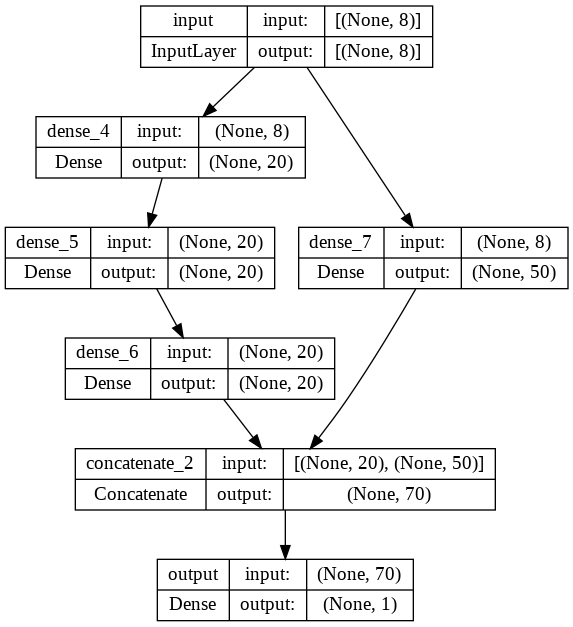

In [ ]:
# model 2


In [ ]:
model2.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 3ms/step - loss: 1.9680 - val_loss: 1.2184
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7292 - val_loss: 0.7062
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6418 - val_loss: 0.5942
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5998 - val_loss: 0.5615
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5669 - val_loss: 0.5402
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5379 - val_loss: 0.5346
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5139 - val_loss: 0.5016
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4928 - val_loss: 0.4820
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4752 - val_loss: 0.4506
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4602 - val_loss: 0.4344
Epoch 11/2

#### 결과 비교

162/162 [==============================] - 1s 3ms/step - loss: 0.3759
mse on test data.  model1=0.39813482761383057, model2=0.3759424388408661


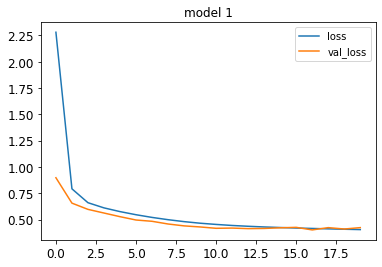

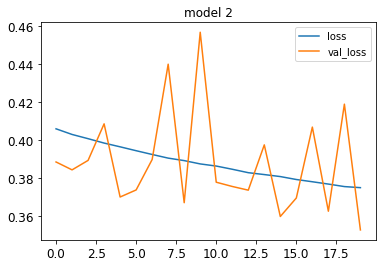

In [ ]:
import pandas as pd

# loss vs epoch
df1 = pd.DataFrame(history1.history)
df1.plot()
plt.title('model 1')

df2 = pd.DataFrame(history2.history)
df2.plot()
plt.title('model 2')

# mse on test data
mse_test1 = model1.evaluate(X_test, y_test)
mse_test2 = model2.evaluate(X_test, y_test)
print('mse on test data.  model1={}, model2={}'.format(mse_test1, mse_test2))

# <font color=red>과제 2 : model2 성능을 높여라 </font>
- layer개수, neuron개수, epoch, 학습률, 옵티마이저 등 바꿔서.